# From Biological to Artificial Neurons
## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the model using the Sequential API

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


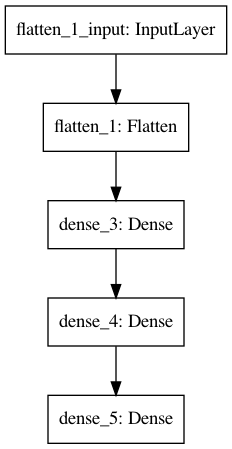

In [10]:
keras.utils.plot_model(model)

In [11]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [14]:
model.get_layer('dense_3') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0104838 ,  0.05387136,  0.00724469, ...,  0.02730262,
         0.0660186 ,  0.06298524],
       [-0.07003306,  0.02263077, -0.03978244, ..., -0.07052936,
        -0.01437077,  0.04371888],
       [-0.02478315, -0.00997329,  0.06979702, ...,  0.03173816,
        -0.0606236 , -0.02715002],
       ...,
       [ 0.04856099,  0.01355252, -0.0182701 , ..., -0.00434037,
        -0.045602  , -0.02462491],
       [ 0.00526366, -0.00203015,  0.00665461, ...,  0.04967949,
         0.04050989, -0.04979835],
       [-0.00035969, -0.04711885, -0.05033031, ...,  0.03858304,
         0.06872866, -0.04057499]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

Note that Dense layer initialized connection weights randomly (required to break symmetry) and biases to zeros. Can use ```kernel_initializer``` and ```bias_initializer``` to tweak these.

### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7145 - accuracy: 0.7676 - val_loss: 0.5229 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4886 - accuracy: 0.8294 - val_loss: 0.4660 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4444 - accuracy: 0.8435 - val_loss: 0.4396 - val_accuracy: 0.8428
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8543 - val_loss: 0.3989 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3955 - accuracy: 0.8601 - val_loss: 0.3892 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3798 - accuracy: 0.8655 - val_loss: 0.3738 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3643 - accuracy: 0.8700 - val_loss: 0.3581 - val_accuracy:

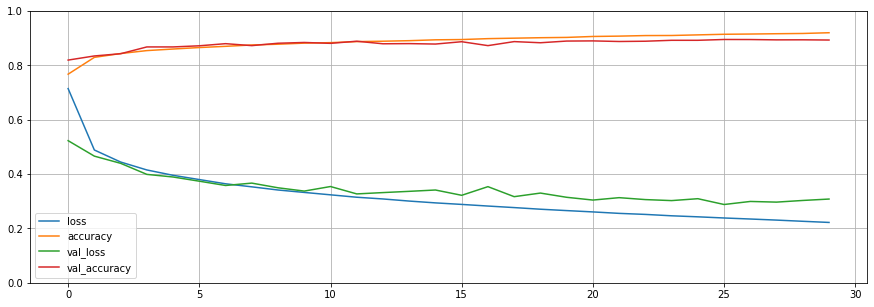

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

looking good! training and validation accuracy steadily increase while training and validation loss decrease. validation curves are also close to training curves, indicating that overfitting doesn't look like a concern.

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.7630 - accuracy: 0.8475


[63.763038635253906, 0.8475000262260437]

### Using the model to make predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API